In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
print(os.listdir("../input"))

['heart.csv']


In [2]:
heart = pd.read_csv('../input/heart.csv')
print("Shape of this data {} \n{} is no of row and {} is no of column."
      .format(heart.shape, heart.shape[0], heart.shape[1]))
heart.head()

Shape of this data (303, 14) 
303 is no of row and 14 is no of column.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## ** *Information about some attributes as follow :-* **
### Sex
    Female  - 0
    Male    - 1
### Chest Pain Type
    typical angina    - 0
    atypical angina   - 1
    non-anginal pain  - 2
    asymptomatic      - 3
### Blood Pressure
    Normally resting blood pressure is aprox 120 millimetres of mercury systolic and 80 millimetres 
    of mercury diastolic. where we are usally say 120/80.
    
    * High Blood Pressure - If systolic blood pressure greater than 130 mm Hg and diastolic blood
    pressure greater than 90 mm Hg.
    * Low Blood Pressure - If systolic blood pressure lower than 90 mm Hg and diastolic blood
    pressure lower than 60 mm Hg
### Cholestoral
    If cholestoral get too high in blood then it could become a heart attack.
    Type of cholestoral is :-
        1. low-density lipoproteins (LDL), or "bad" cholesterol - It should be less than 100 mg/dl.
                100-129 mg/dl is acceptable for people
                130 and above is bad for people
        2. high-density lipoproteins (HDL), or "good" cholesterol - It should be at least 40 mg/dl 
                and it is as good as it is.
        3. triglycerides cholestrol - It should be less than 150 mg/dl.
       
       * Serum Cholestrol = Addtion of LDL, HDL and 20% of triglycerides.
               less than 200 mg/dl --- Good
               200-239 mg/dl --- Borderline High
               240 mg/dl --- High
#### Fasting blood suger
    Normaly fasting blood suger should be 70 to 130 mg/dl.
    
        
    

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#Check null value in this data 
print(list(heart.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False]


#### So, There is no any null value in this dataset

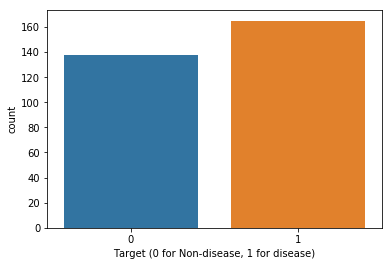

1    165
0    138
Name: target, dtype: int64

In [5]:
#counting target variable
sb.countplot(x='target', data=heart)
plt.xlabel("Target ({} for Non-disease, {} for disease)".format(0, 1))
plt.show()
heart.target.value_counts()

In [6]:
len_No_Disease, len_Disease = (len(heart[heart.target == 0]), len(heart[heart.target == 1]))
len_heart = heart.shape[0]
print("Patients which havn't heart disease: {:.2f}%".format(len_No_Disease/(len_heart)*100))
print("Patients which have heart disease: {:.2f}%".format(len_Disease/(len_heart)*100))

Patients which havn't heart disease: 45.54%
Patients which have heart disease: 54.46%


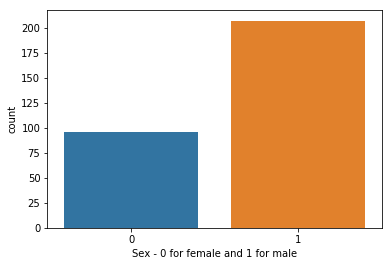

In [7]:
#Counting about sex
sb.countplot(x='sex', data=heart)
plt.xlabel("Sex - {} for female and {} for male".format(0, 1))
plt.show()

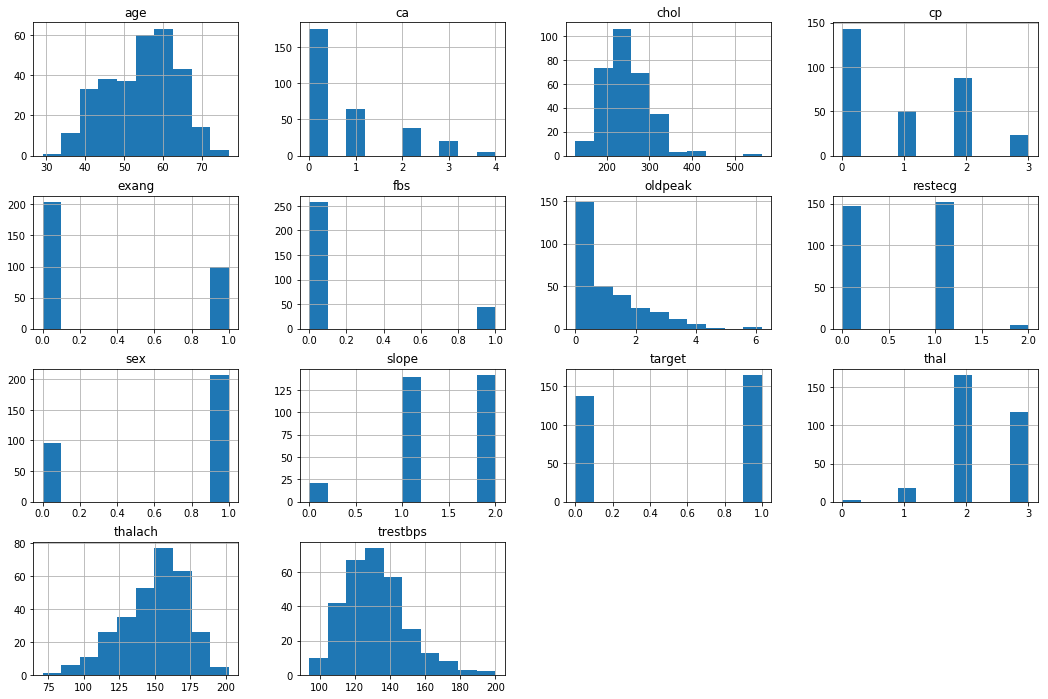

In [8]:
heart.hist(figsize=(18, 12))
plt.show()

In [9]:
col = ['age', 'sex', 'cp', 'fbs', 'restecg', 'trestbps',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

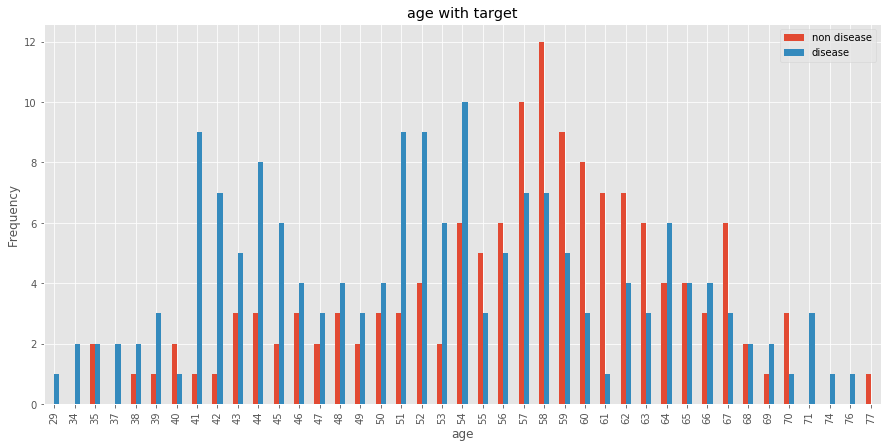

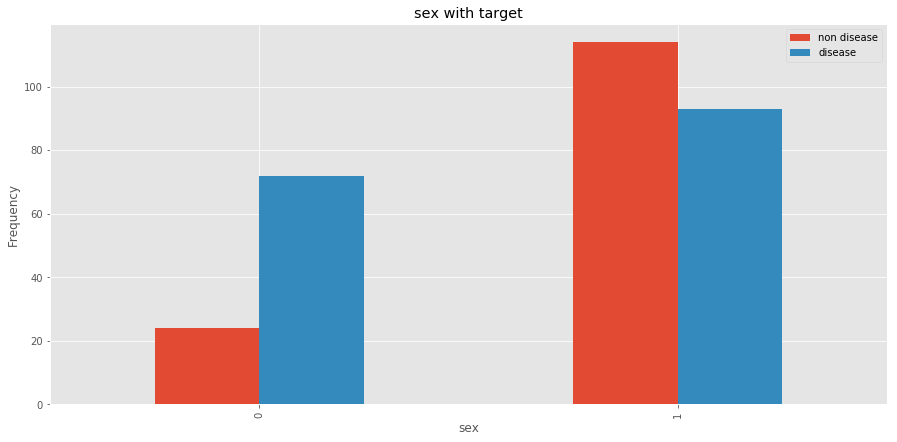

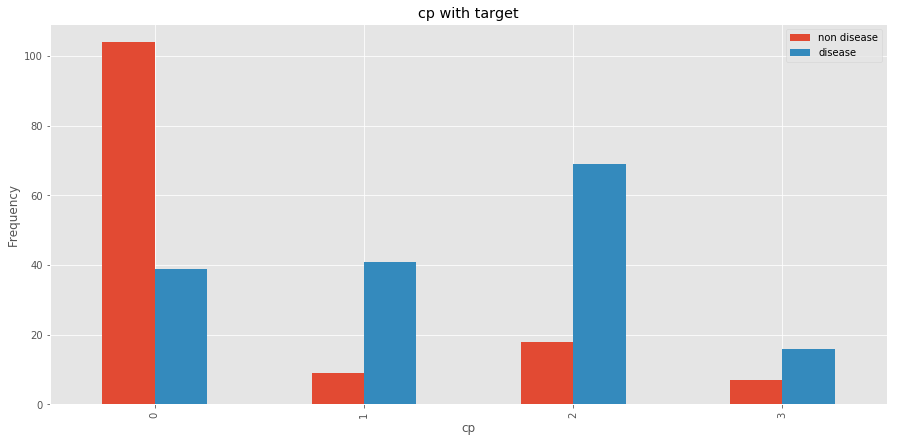

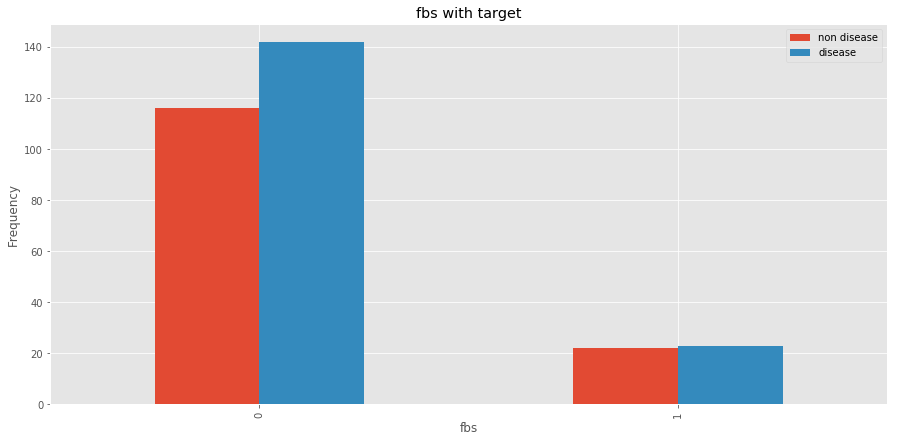

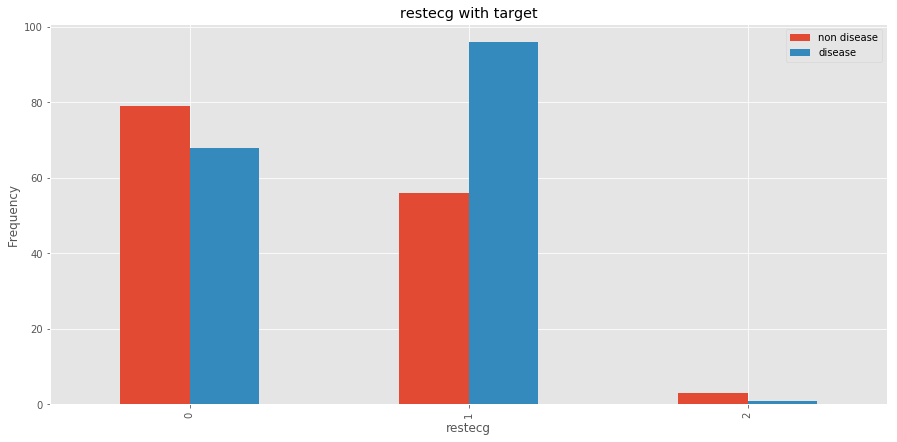

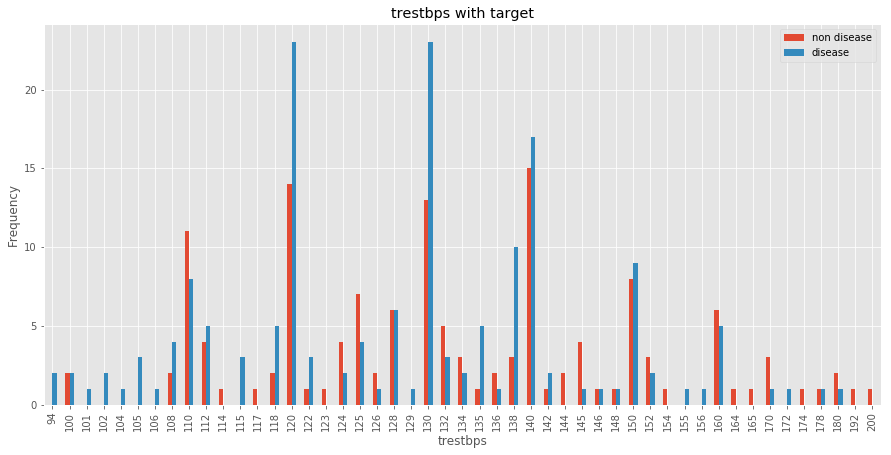

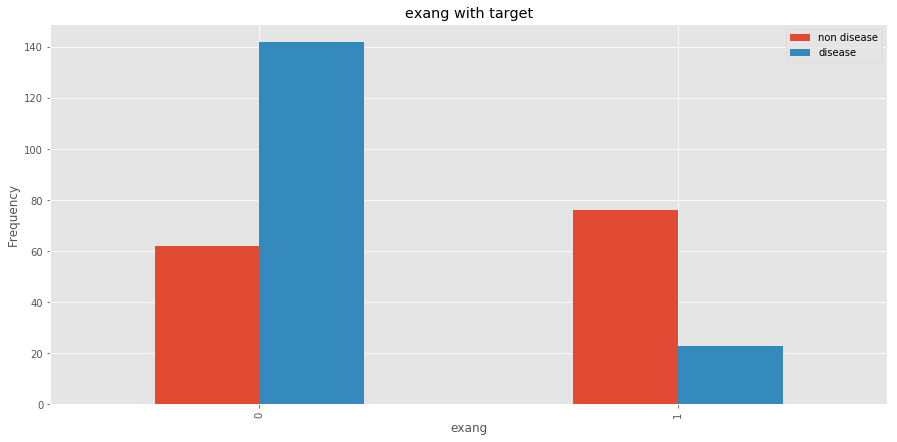

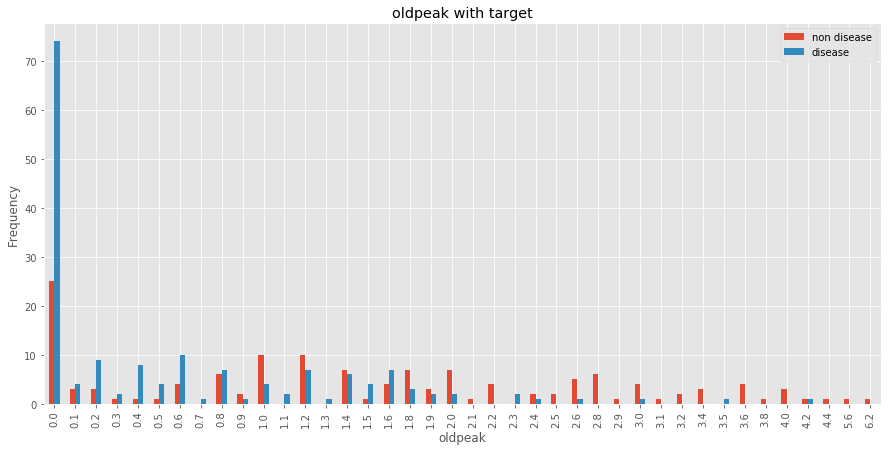

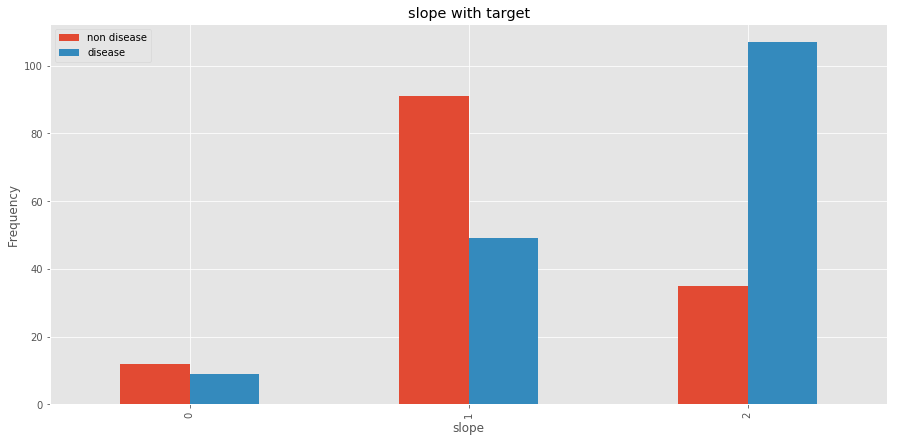

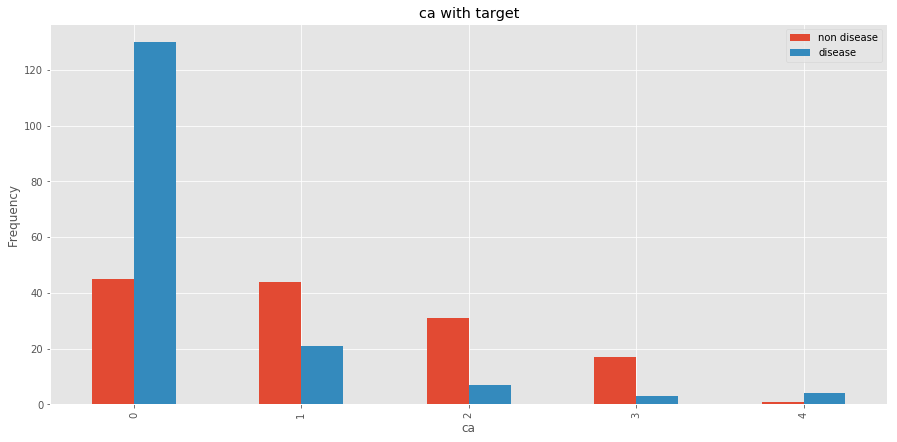

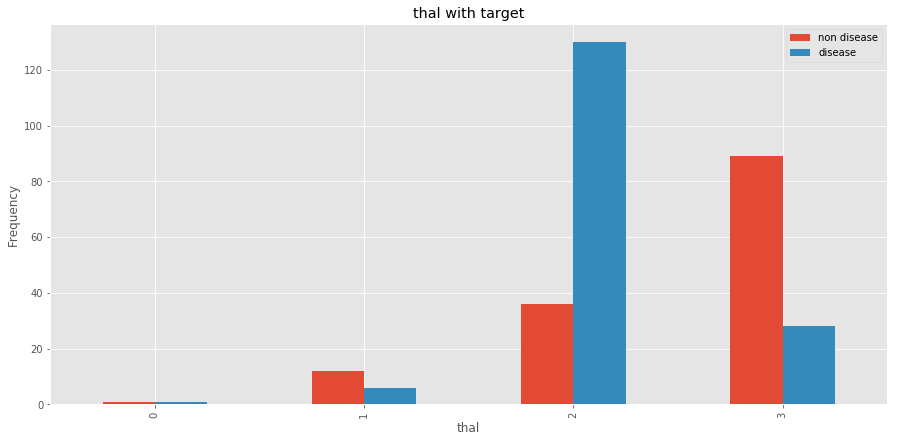

In [10]:
plt.style.use('ggplot')
for item in col:
    pd.crosstab(heart[item], heart.target).plot(kind='bar', figsize=(15, 7))
    plt.title("{} with target".format(str(item)))
    plt.legend(["non disease", "disease"])
    plt.ylabel("Frequency")
plt.show()

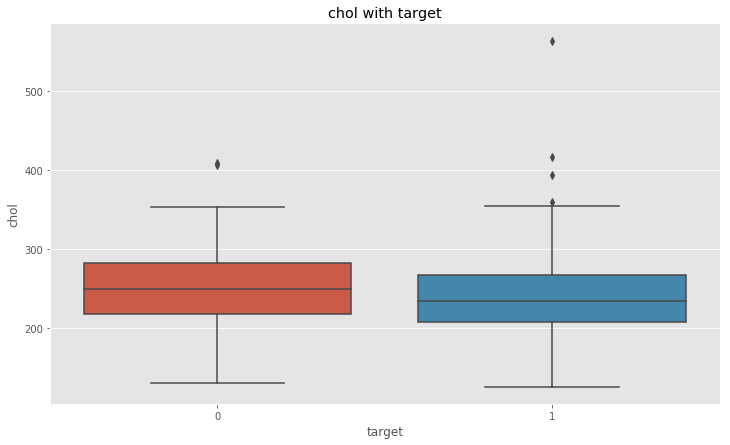

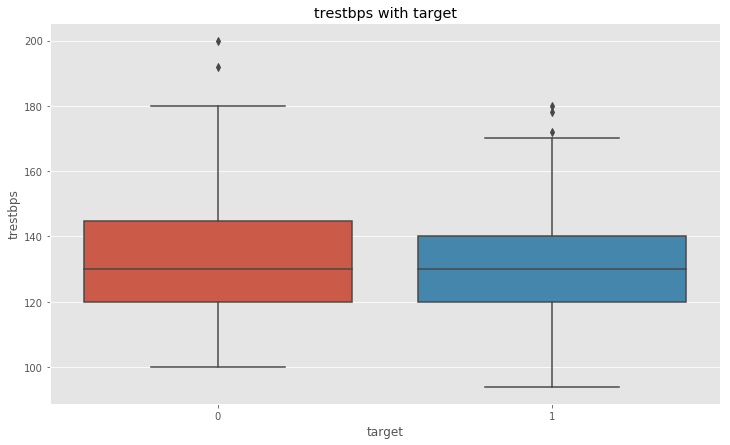

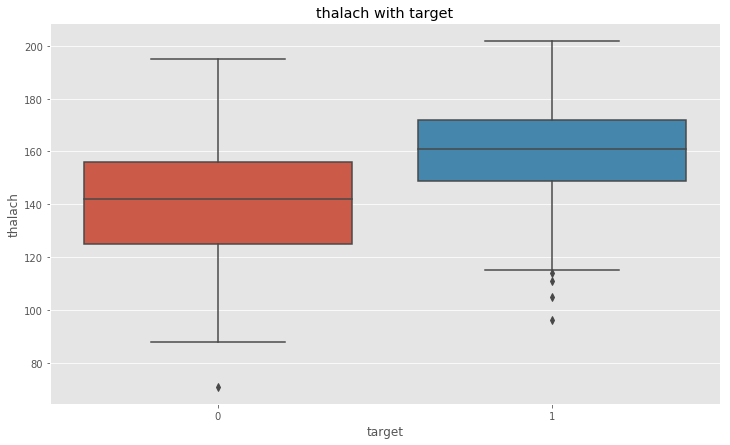

In [11]:
plt.style.use('ggplot')
left_col = ['chol', 'trestbps', 'thalach']
for col in left_col:
    plt.figure(figsize=(12, 7))
    plt.title("{} with target".format(col))
    sb.boxplot(x=heart.target, y=heart[col])
plt.show()

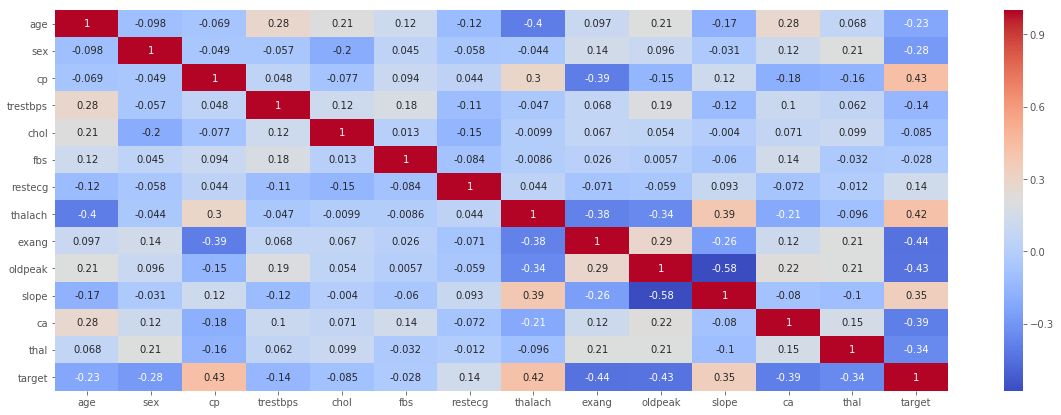

In [12]:
plt.subplots(figsize=(20,7))
sb.heatmap(heart.corr(), annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


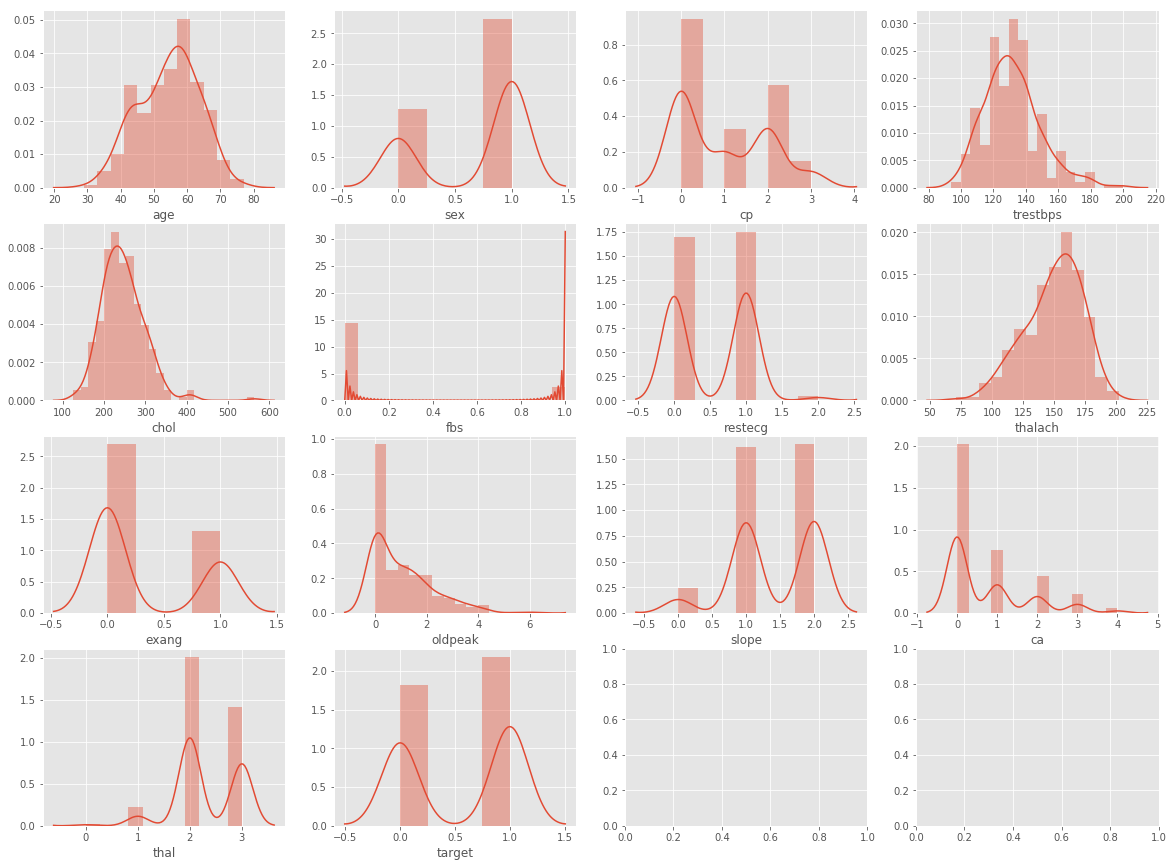

In [13]:
f, axes = plt.subplots(4,4, figsize=(20, 15))
sb.distplot( heart["age"], ax=axes[0,0])
sb.distplot( heart["sex"], ax=axes[0,1])
sb.distplot( heart["cp"], ax=axes[0,2])
sb.distplot( heart["trestbps"], ax=axes[0,3])
sb.distplot( heart["chol"], ax=axes[1,0])
sb.distplot( heart["fbs"], ax=axes[1,1])
sb.distplot( heart["restecg"], ax=axes[1,2])
sb.distplot( heart["thalach"], ax=axes[1,3])
sb.distplot( heart["exang"], ax=axes[2,0])
sb.distplot( heart["oldpeak"], ax=axes[2,1])
sb.distplot( heart["slope"], ax=axes[2,2])
sb.distplot( heart["ca"], ax=axes[2,3])
sb.distplot( heart["thal"], ax=axes[3,0])
sb.distplot( heart["target"], ax=axes[3,1])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


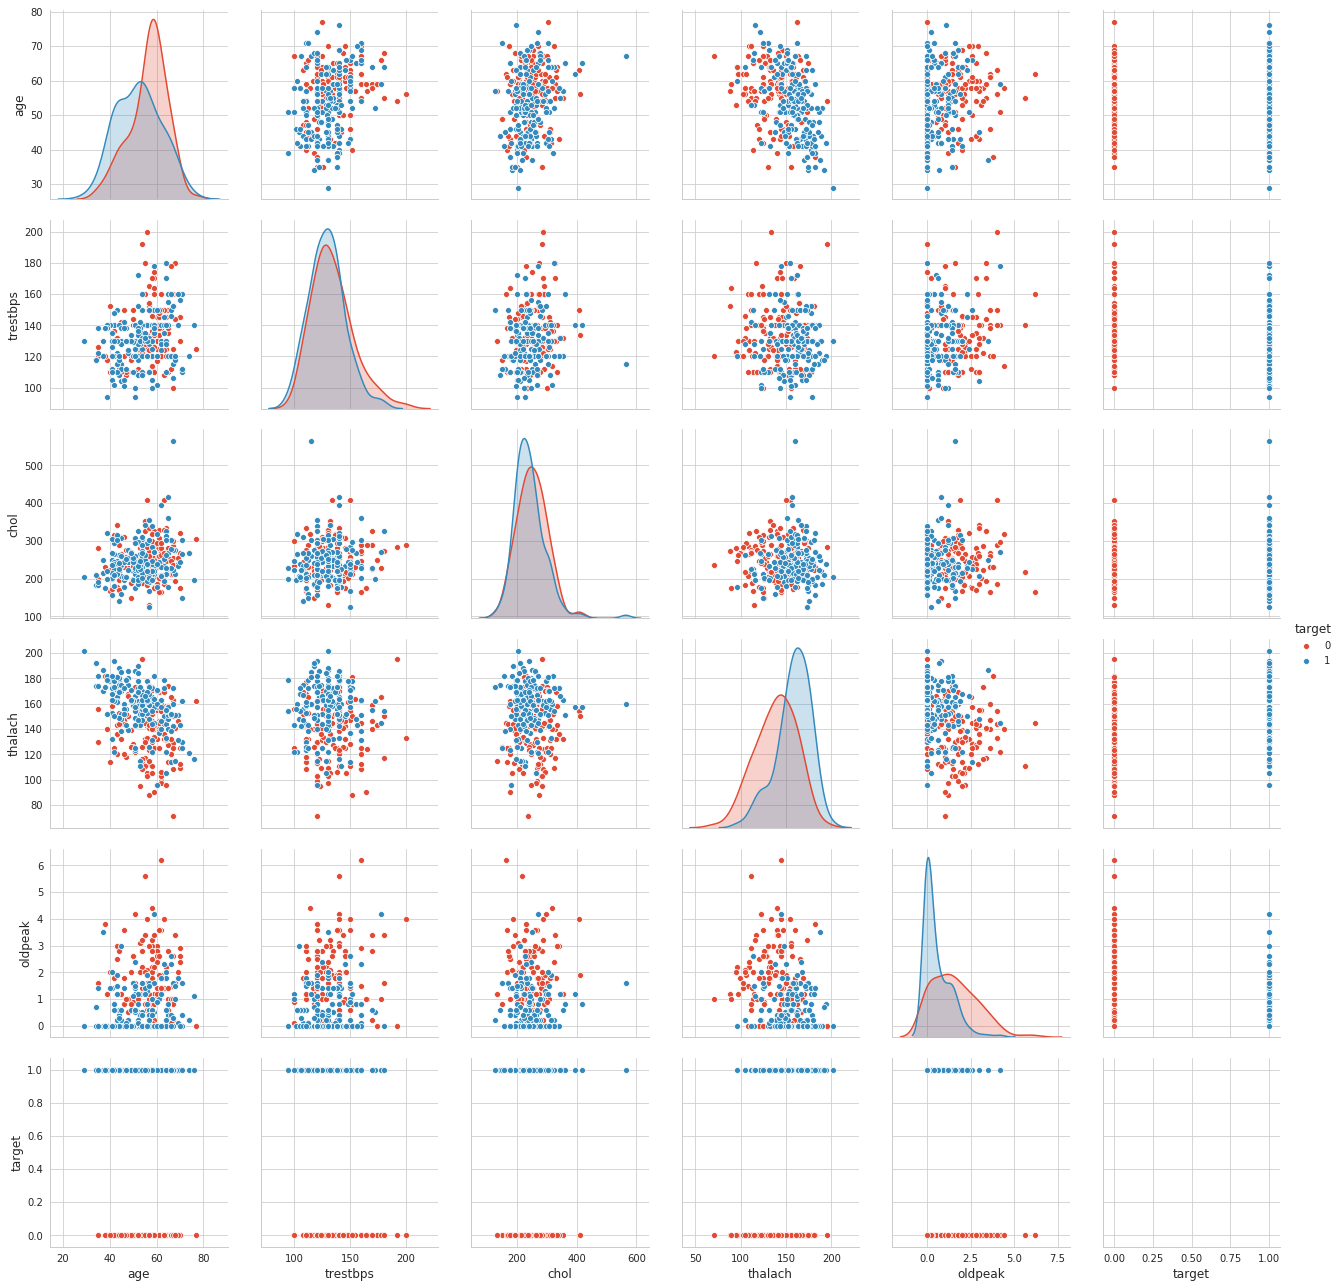

In [14]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']
sb.set_style('whitegrid')
sb.pairplot(heart[cols], height=3, hue='target')
plt.show()

In [15]:
y = heart.target
X = heart.drop(['target'], axis=1).values

In [16]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Train Modal** 
    1. Logistic Regression
    2. Decision Tree Classificion
    3. Random Forest Classificion
    4. Support Vector Machine

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

Acurracy of Logistic Regression is 85.25
AUC-ROC Curve of Logistic Regression is 84.86

Acurracy of Decision Tree is 77.05
AUC-ROC Curve of Decision Tree is 77.12

Acurracy of Random Forest is 88.52
AUC-ROC Curve of Random Forest is 88.56

Acurracy of SVM is 81.97
AUC-ROC Curve of SVM is 81.15

Acurracy of Gradient Boosting is 85.25
AUC-ROC Curve of Gradient Boosting is 84.48



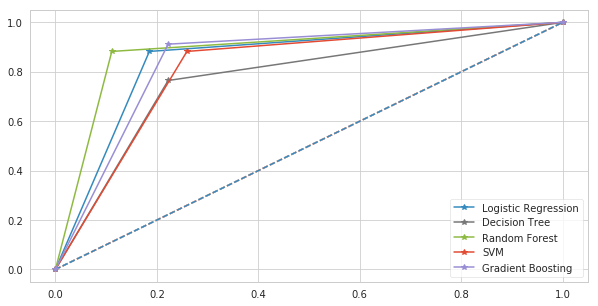

In [18]:
algo = {'Logistic Regression': LogisticRegression(solver='liblinear'), 
        'Decision Tree':DecisionTreeClassifier(), 
        'Random Forest':RandomForestClassifier(n_estimators=10, random_state=0), 
        'SVM':SVC(gamma=0.01, kernel='linear'),
        'Gradient Boosting' :GradientBoostingClassifier(max_features=1, learning_rate=0.05)
       }
predict_value = {}
plt.figure(figsize=(10, 5))
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    predict_value[k] = model.score(X_test, y_test)*100
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))
    print('AUC-ROC Curve of ' + k + ' is {0:.2f}\n'.format(roc_auc*100))
    
    # plot the roc curve for the model
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate, marker='*', label=k)
    plt.legend(loc='lower right')
    
plt.show()

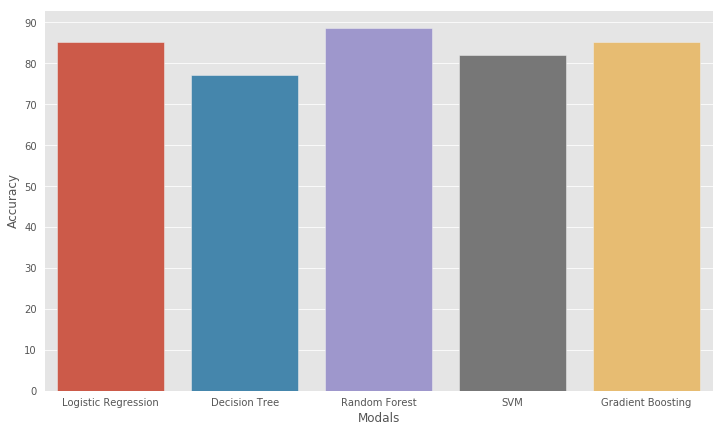

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sb.barplot(x=list(predict_value.keys()), y=list(predict_value.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Modals")
plt.show()